In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore",category=UserWarning)

In [17]:

data=pd.read_csv("milknew.csv")
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [18]:
high=data[data.Grade=="high"]
medium=data[data.Grade=="medium"]
low=data[data.Grade=="low"]

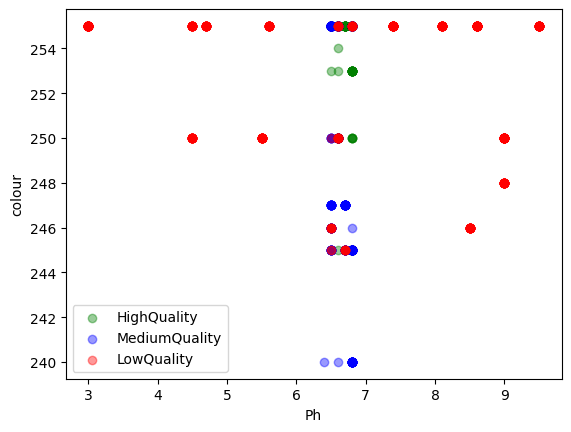

In [19]:
plt.scatter(high.pH, high.Colour, color="green", label="HighQuality", alpha = 0.4)
plt.scatter(medium.pH, medium.Colour, color="blue",label="MediumQuality",alpha=0.4)
plt.scatter(low.pH, low.Colour, color="red", label="LowQuality", alpha = 0.4)
plt.xlabel("Ph")
plt.ylabel("colour")
plt.legend()
plt.savefig('MilkQuality.png',dpi=300)
plt.show()

In [20]:
y=data.Grade.values
x=data.drop(["Grade"],axis=1)


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=5)


In [22]:
k_values = list(range(1, 10))

mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)  # 5x cross value score
    mean_scores.append(scores.mean())

# Optimal k values =
optimal_k = k_values[mean_scores.index(max(mean_scores))]
print("Optimal k value:", optimal_k)

#create final model with Optimal k values
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(x_train, y_train)

# Accuracy with optimal k value
accuracy = final_knn.score(x_test, y_test)
print(f"Accuracy with optimal k value: %{accuracy * 100:.2f}")
sc = MinMaxScaler()
sc.fit_transform(x.values)

Optimal k value: 1
Accuracy with optimal k value: %100.00


array([[0.55384615, 0.01785714, 1.        , ..., 1.        , 0.        ,
        0.93333333],
       [0.55384615, 0.03571429, 0.        , ..., 0.        , 1.        ,
        0.86666667],
       [0.84615385, 0.64285714, 1.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.10714286, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.58461538, 0.16071429, 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.86153846, 0.375     , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [23]:
def newprediction():
    v1 = float(input("Enter your pH(This Column defines PH alus of the milk which ranges from 3 to 9.5 max : 6.25 to 6.90): "))
    v2 = int(input("Enter your Temprature(This Column defines Temprature of the milk which ranges from 34'C to 90'C max : 34'C to 45.20'C): "))
    v3 = int(input("Enter your Taste(This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good) max : 1 (Good)): "))
    v4 = float(input("Enter your Odor(This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) max : 0 (Bad)): "))  
    v5 = int(input("Enter your Fat(This Column defines Odor of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)): "))  
    v6 = int(input("Enter your Turbidity(This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)): "))
    v7 = int(input("Enter your Colour(This Column defines Colour of the milk which ranges from 240 to 255 max : 255): "))

    new_prediction = final_knn.predict(np.array([[v1, v2, v3, v4, v5, v6, v7]]))

    if new_prediction[0] == "high":
        print("You are in the High Quality category.")
    elif new_prediction[0] == "medium":
        print("You are in the Medium Quality category.")
    elif new_prediction[0] == "low":
        print("You are in the Low Quality category.")
    else:
        print("Invalid prediction.")


newprediction()



You are in the Low Quality category.
